<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%ED%95%9C%EB%81%9D_10%EC%9E%A5_CIFAR10_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10


In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 5s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-4-54d3e6c70700>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


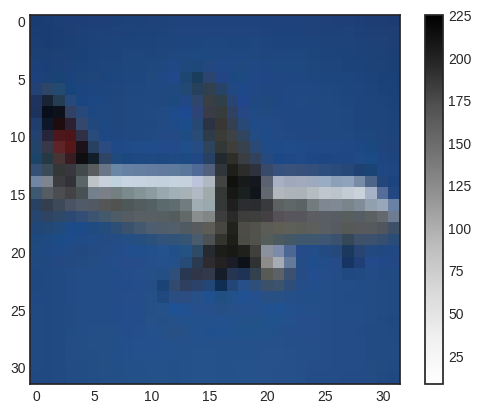

airplane


In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()
idx = y_train[0]
print(class_names[int(idx)])

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(3072, ), name='input'))
model.add(layers.Dense(2048, name='hidden1'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(1024, name='hidden2'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(512, name='hidden3'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 hidden2 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

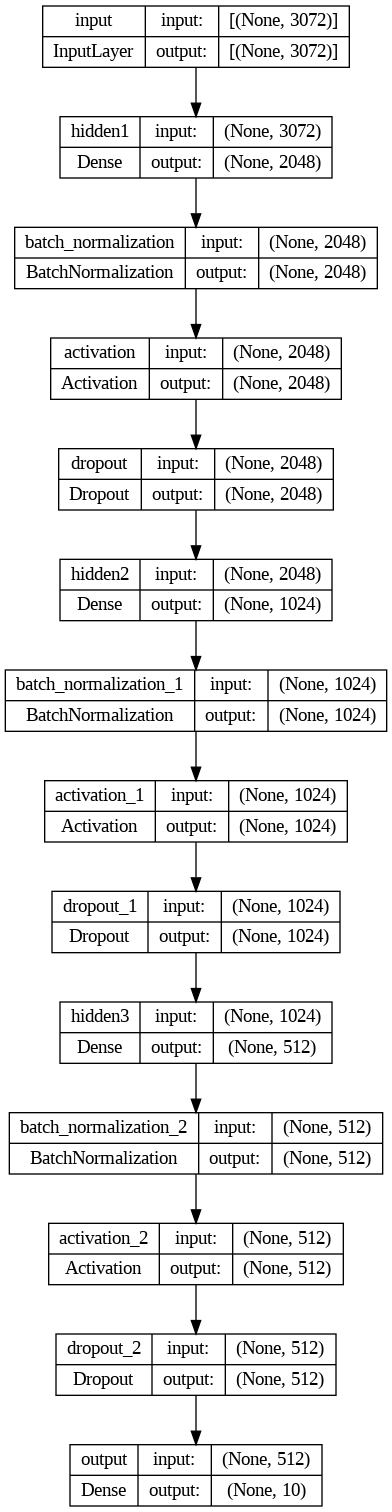

In [10]:
utils.plot_model(model, show_shapes=True)

In [11]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200, batch_size=4,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/200
10000/10000 [==============================] - 1196s 119ms/step - loss: 2.2045 - accuracy: 0.2206 - val_loss: 1.8530 - val_accuracy: 0.3453
Epoch 2/200
10000/10000 [==============================] - 1279s 128ms/step - loss: 2.0106 - accuracy: 0.2716 - val_loss: 1.8285 - val_accuracy: 0.3917
Epoch 3/200
10000/10000 [==============================] - 1253s 125ms/step - loss: 1.9723 - accuracy: 0.2936 - val_loss: 1.8553 - val_accuracy: 0.3993
Epoch 4/200
10000/10000 [==============================] - 1248s 125ms/step - loss: 1.9460 - accuracy: 0.3031 - val_loss: 1.9191 - val_accuracy: 0.4160
Epoch 5/200
10000/10000 [==============================] - 1264s 126ms/step - loss: 1.9377 - accuracy: 0.3091 - val_loss: 1.9436 - val_accuracy: 0.4181
Epoch 6/200
10000/10000 [==============================] - 1180s 118ms/step - loss: 1.9177 - accuracy: 0.3142 - val_loss: 1.9522 - val_accuracy: 0.4156
Epoch 7/200
10000/10000 [==============================] - 1182s 118ms/step - loss: 1.91

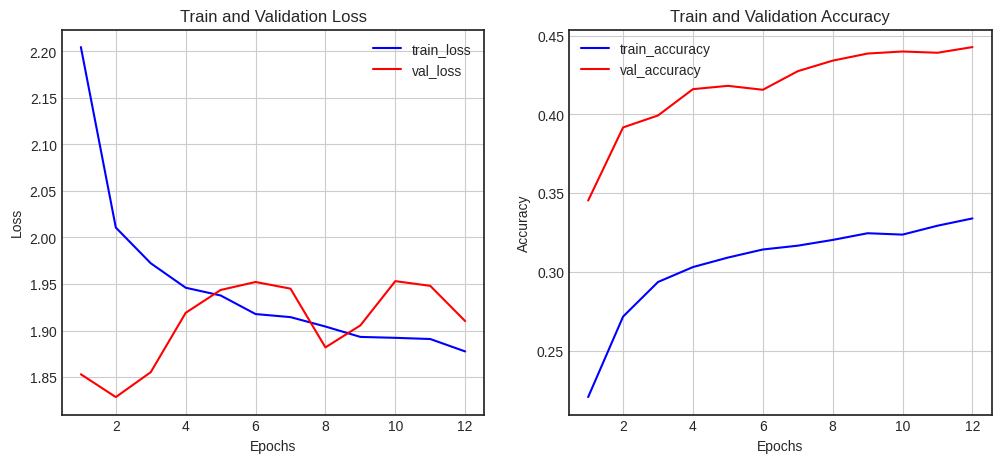

In [12]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

import matplotlib.pyplot as plt
import numpy as np
show_history(history)

In [13]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.7865 - accuracy: 0.4049


[1.7864736318588257, 0.4049000144004822]